In [1]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import netCDF4 as nc
import pandas as pd
import numpy as np 
import torch
import os
plt.style.use('classic')

/home/resifis/anaconda3/envs/kaustenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATAPATH = os.environ.get("DATAPATH","/home/resifis/Desktop/kaustcode/Packages/processed_clean_data")

In [3]:
timestep = 1

# Load Data

# Cloud Thinkness

In [5]:
netcdf_dataset_thickness = Dataset(os.path.join(DATAPATH,"thickness.nc"),mode = 'r')

In [7]:
cloud_thickness = np.array(netcdf_dataset_thickness.variables["thickness"][timestep,:,:])

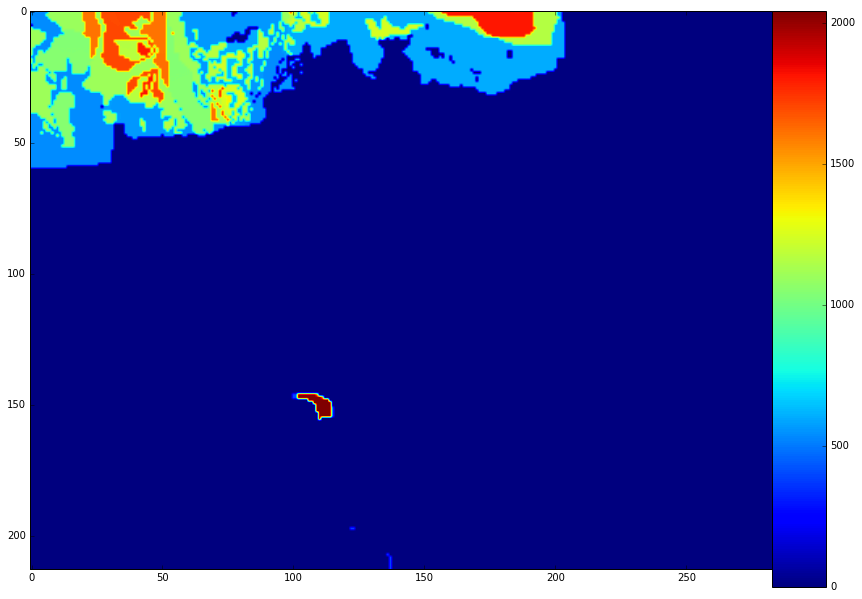

In [8]:
plt.figure(figsize = (15,10))
plt.imshow(np.flip(cloud_thickness,axis = 0))
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
plt.colorbar(cax=cax)

In [1]:
cloud_thickness.shape

NameError: name 'cloud_thickness' is not defined

## MSLP

In [4]:
data_path = os.path.join(DATAPATH,"mslp.nc") 
netcdf_dataset_mslp = Dataset(data_path,mode = 'r')
mslp = np.array(netcdf_dataset_mslp.variables["mslp"][timestep,:,:])

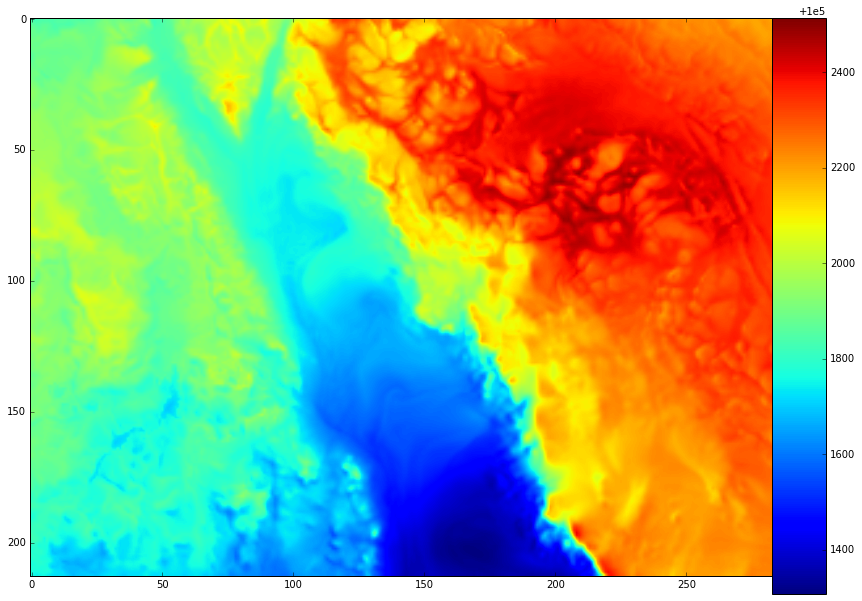

In [5]:
plt.figure(figsize = (15,10))
plt.imshow(np.flip(mslp,axis = 0))
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
plt.colorbar(cax=cax)

# T2

In [6]:
data_path = os.path.join(DATAPATH,"t2.nc") 
netcdf_dataset_t2 = Dataset(data_path,mode = 'r')
t2 = np.array(netcdf_dataset_t2.variables["t2"][timestep,:,:])

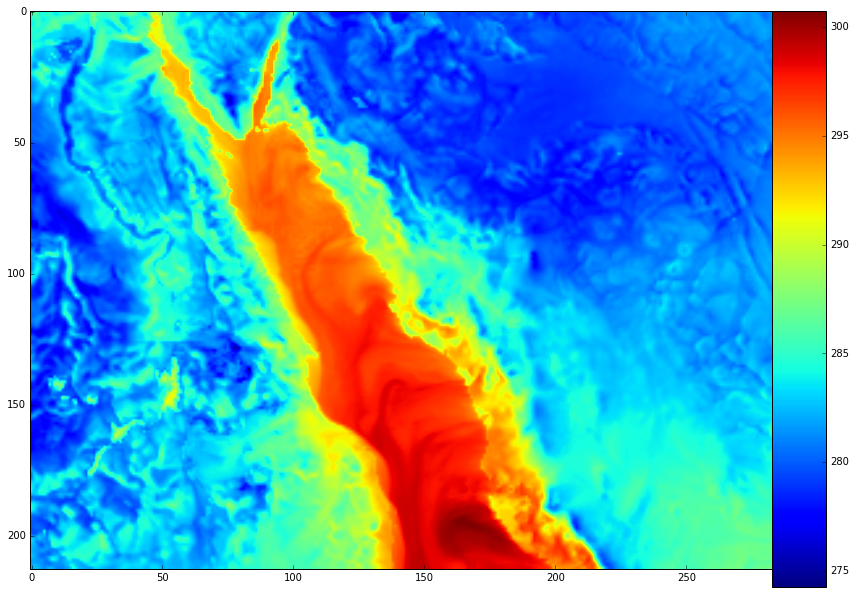

In [7]:
plt.figure(figsize = (15,10))
plt.imshow(np.flip(t2,axis = 0))
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
plt.colorbar(cax=cax)

## Wind Speed

In [8]:
data_path = os.path.join(DATAPATH,"WS.nc") 
netcdf_dataset_Ws = Dataset(data_path,mode = 'r')
WS = np.array(netcdf_dataset_Ws.variables["WS"][timestep,:,:])

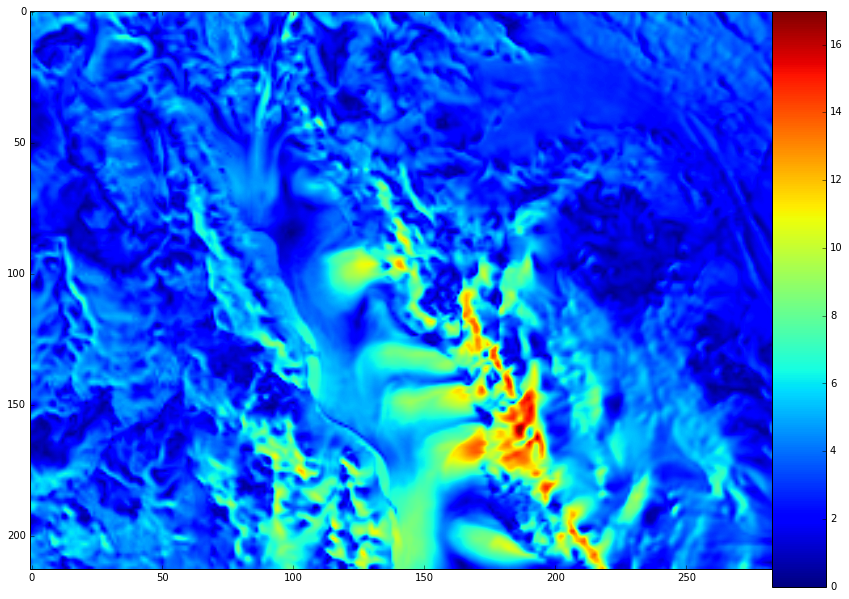

In [9]:
plt.figure(figsize = (15,10))
plt.imshow(np.flip(WS,axis = 0))
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
plt.colorbar(cax=cax)

## Wind Direction

In [10]:
data_path = os.path.join(DATAPATH,"WD.nc") 
netcdf_dataset_WD = Dataset(data_path,mode = 'r')
WD = np.array(netcdf_dataset_WD.variables["WD"][timestep,:,:])

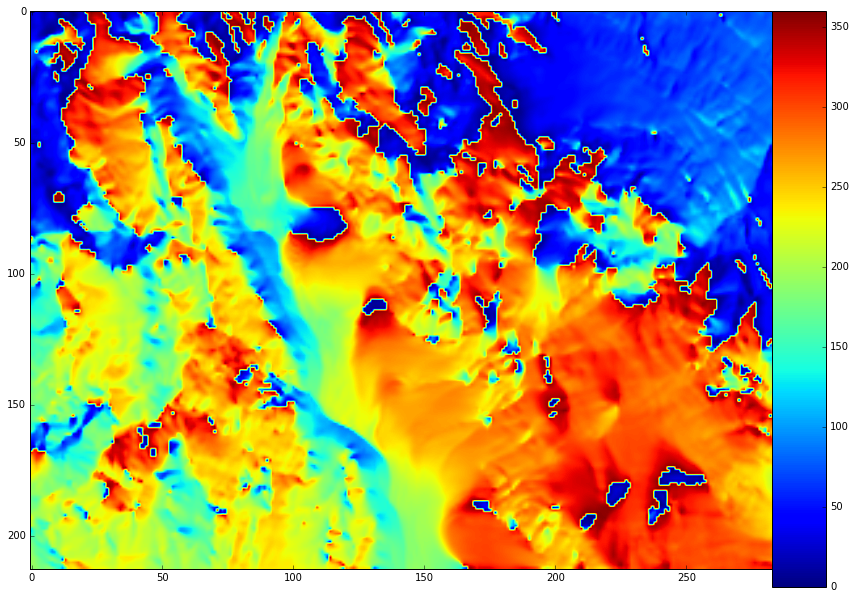

In [11]:
plt.figure(figsize = (15,10))
plt.imshow(np.flip(WD,axis = 0))
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
plt.colorbar(cax=cax)

## DT2

In [12]:
data_path = os.path.join(DATAPATH,"dt2.nc") 
netcdf_dataset_dt2 = Dataset(data_path,mode = 'r')
dt2 = np.array(netcdf_dataset_dt2.variables["td2"][timestep,:,:])

In [1]:
netcdf_dataset_dt2.variables


NameError: name 'netcdf_dataset_dt2' is not defined

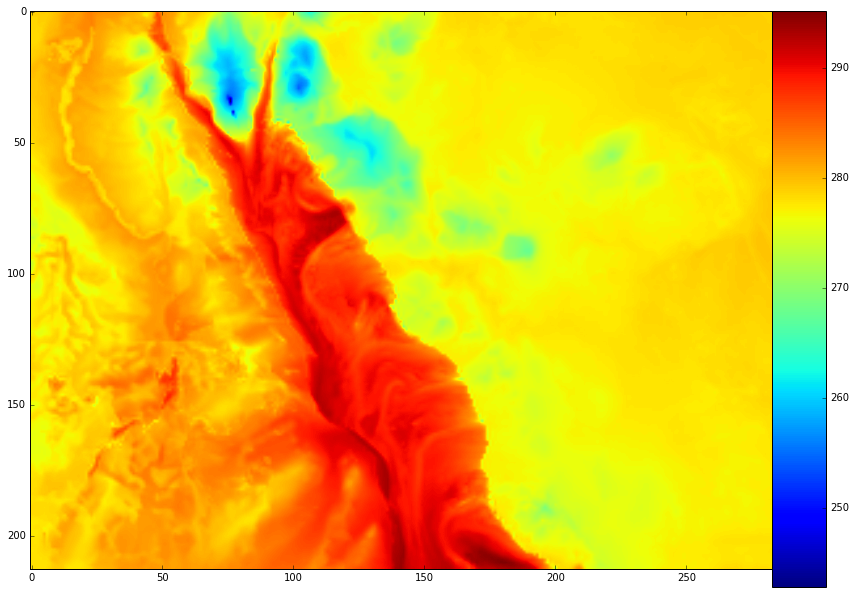

In [13]:
plt.figure(figsize = (15,10))
plt.imshow(np.flip(dt2,axis = 0))
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
plt.colorbar(cax=cax)

## AOD 

In [14]:
data_path = os.path.join(DATAPATH,"aod.nc") 
netcdf_dataset_aod = Dataset(data_path,mode = 'r')

In [15]:
aod = np.array(netcdf_dataset_aod.variables["aod5503d"][timestep,:,:])

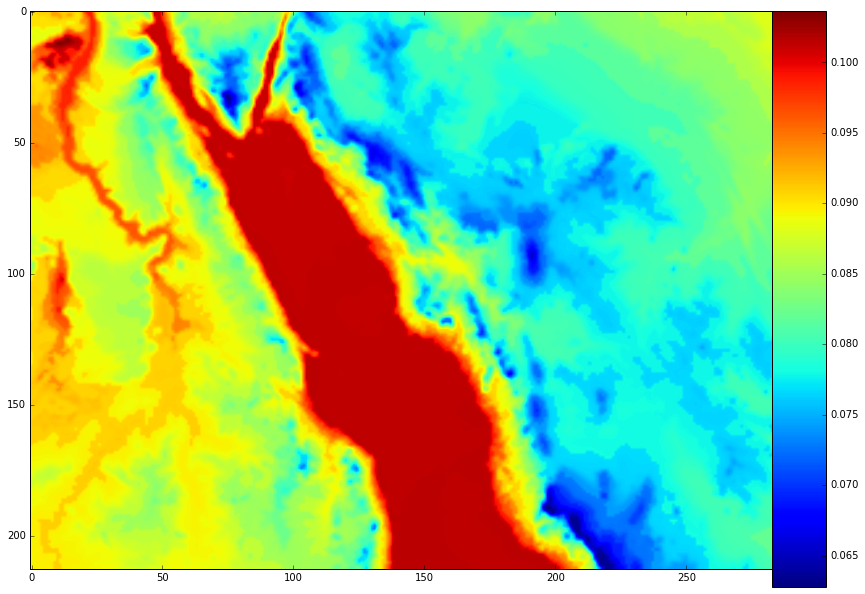

In [16]:
plt.figure(figsize = (15,10))
plt.imshow(np.flip(aod,axis = 0))
cax = plt.axes([0.85, 0.1, 0.05, 0.8])
plt.colorbar(cax=cax)

# Cloud cover

In [17]:
def loat_clouds(cloud_type):
    if cloud_type == "high":
        data_path = os.path.join(DATAPATH,"hcloud.nc")
        netcdf_dataset_cc = Dataset(data_path,mode = 'r')
    elif cloud_type == "meduim":
        data_path = os.path.join(DATAPATH,"mcloud.nc")
        netcdf_dataset_cc = Dataset(data_path,mode = 'r')
    else :
        data_path = os.path.join(DATAPATH,"lcloud.nc")
        netcdf_dataset_cc = Dataset(data_path,mode = 'r')
    return netcdf_dataset_cc
ctype = "high"
netcdf_dataset_cc = loat_clouds(ctype)
prefix = ctype[0]

In [18]:
netcdf_dataset_cc.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
 unlimited dimensions: 
 current shape = (48222,)
 filling on, default _FillValue of -2147483647 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
 unlimited dimensions: 
 current shape = (288,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
 unlimited dimensions: 
 current shape = (213,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'cc': <class 'netCDF4._netCDF4.Variable'>
 float32 cc(time, lat, lon)
 unlimited dimensions: 
 current shape = (48222, 213, 288)
 filling on, default _FillValue of 9.969209968386869e+36 used}

In [19]:
cc = np.array(netcdf_dataset_cc.variables[f"cc"][timestep,:,:])

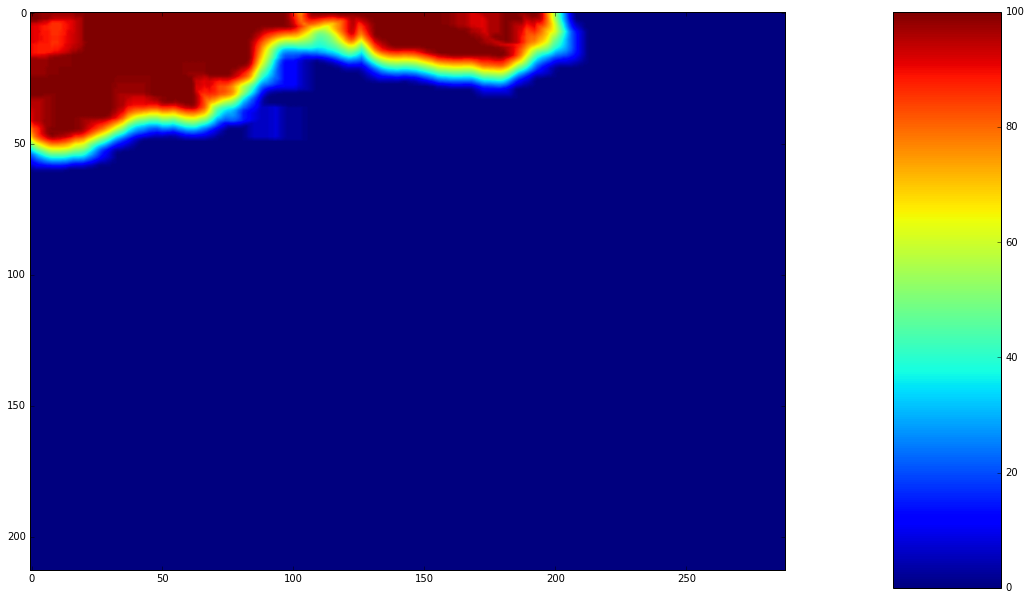

In [20]:
fig,ax = plt.subplots(figsize = (20,10))
plt.imshow(np.flip(cc,axis = 0))
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

# GHI

In [21]:
data_path = os.path.join(DATAPATH,"ghi.nc") 
GHI = Dataset(data_path,mode = 'r')

In [22]:
corr_GHI = GHI.variables["lon"][:]

In [23]:
GHI_data = np.array(GHI.variables["ghi"][timestep,:,:])

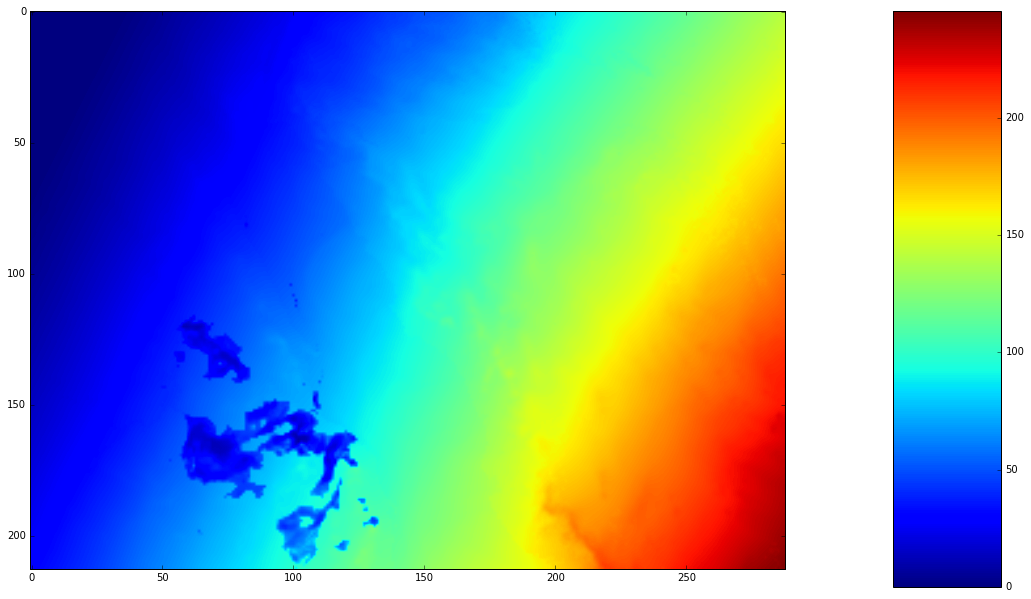

In [24]:
fig,ax = plt.subplots(figsize = (20,10))
plt.imshow(np.flip(GHI_data,axis = 0))
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

# Water Vapor

In [25]:
%time
data_path = os.path.join(DATAPATH,"water_vapor_new.nc") 
netcdf_dataset_wv = Dataset(data_path,model = 'r')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [26]:
water_vapor = np.array(netcdf_dataset_wv.variables["qvapor"][timestep,:,:])

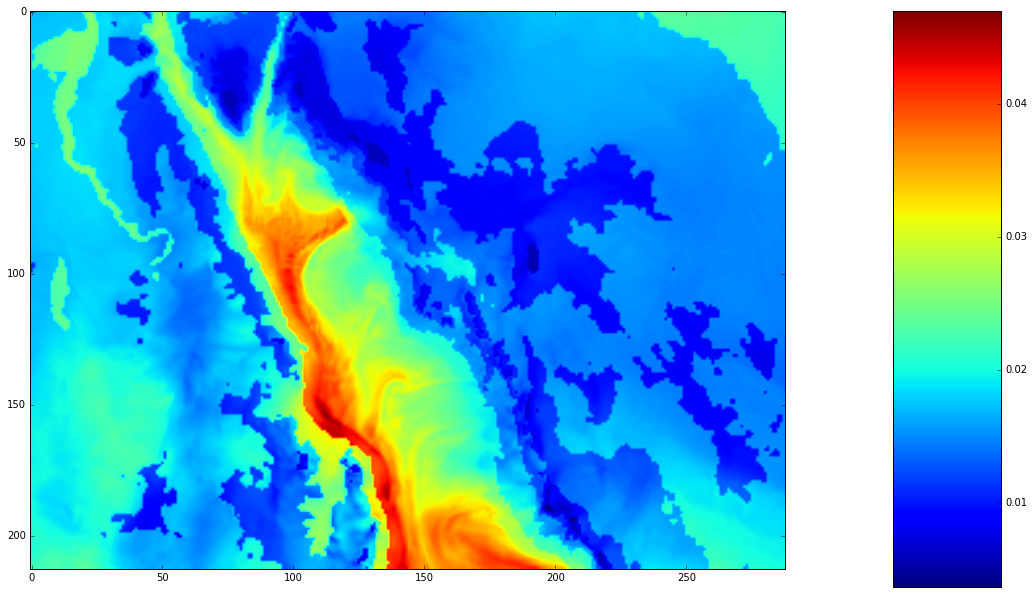

In [27]:
plt.figure(figsize = (20,10))
plt.imshow(np.flip(water_vapor,axis = 0))
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

# Ozone data

In [28]:
data_path = os.path.join(DATAPATH,"ozone.nc") 
netcdf_dataset_ozone = Dataset(data_path)

In [29]:
netcdf_dataset_ozone.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
 unlimited dimensions: 
 current shape = (48222,)
 filling on, default _FillValue of -2147483647 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
 unlimited dimensions: 
 current shape = (288,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
 unlimited dimensions: 
 current shape = (213,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'o3rad': <class 'netCDF4._netCDF4.Variable'>
 float32 o3rad(time, lat, lon)
 unlimited dimensions: 
 current shape = (48222, 213, 288)
 filling on, default _FillValue of 9.969209968386869e+36 used}

In [30]:
ozone = np.array(netcdf_dataset_ozone.variables["o3rad"][timestep,:,:])

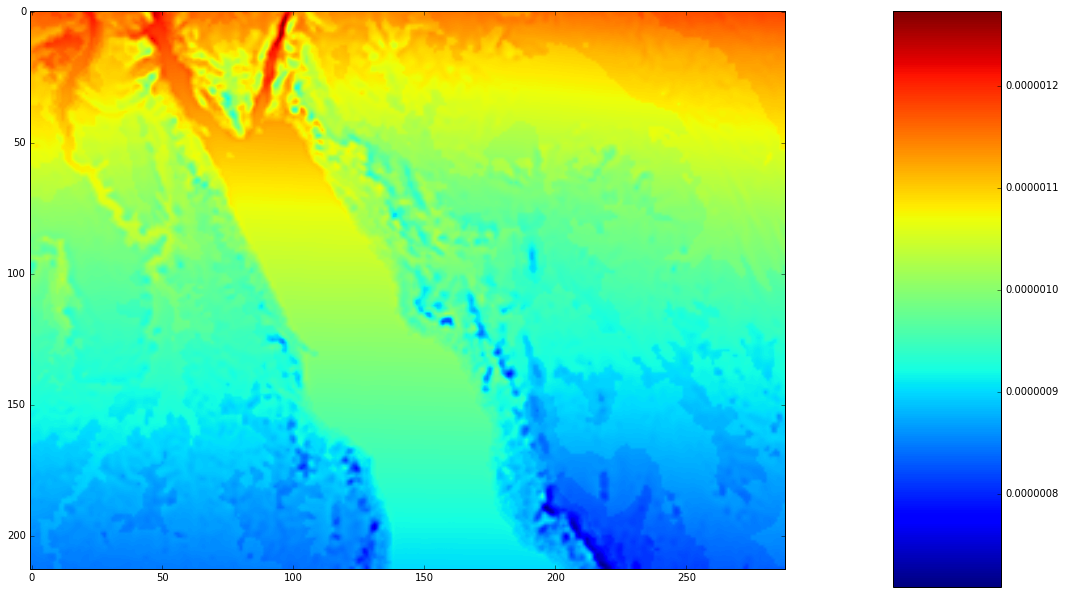

In [31]:
plt.figure(figsize = (20,10))
plt.imshow(np.flip(ozone,axis = 0))
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

# Animation